# kNN (K-Nearest Neighbors)

In [5]:
import torch
import pandas as pd

In [15]:
chunks = torch.rand(4, 4, 20) #Sample chunks
e_db = pd.DataFrame(torch.rand(20000, 1, 20, 20).tolist()) #Sample embedding database

In [20]:
#Chunks might be getting built wrong where its cutting them in half the wrong way

def get_kNN(chunks, e_db, k = 2):
    """
    Input: chunks - tensor containing initial data
            e_db - dataframe containing embeddings
    Description: find k-nearest-neighbours of input tensor
    Output: tensor containing the k-nearest-neighbours of input tensor
    """
    neighbours = torch.tensor([])
    for i, chunk in enumerate(chunks):
        e_db['L2'] = e_db.apply(lambda x:torch.linalg.norm(chunk - torch.tensor(x[0][chunk.size(0) * i:chunk.size(0) * (i + 1)])).item(), axis=1)
        kNN = torch.tensor([e_db.nsmallest(k, ['L2'])[0].tolist()])
        neighbours = torch.cat([neighbours, kNN])
    return neighbours

neighbours = get_kNN(chunks, e_db)
print(neighbours.size())

torch.Size([4, 2, 20, 20])


In [21]:
def new_kNN(chunks, e_db, k = 2):
    """
    Input: chunks - tensor containing initial data
            e_db - dataframe containing embeddings
    Description: find k-nearest-neighbours of input tensor
    Output: tensor containing the k-nearest-neighbours of input tensor
    """
    e_db = torch.squeeze(torch.tensor(e_db[0]))
    neighbours = torch.tensor([])
    for i, chunk in enumerate(chunks):
        neighbours = torch.cat(
            [
                neighbours, 
                e_db[
                    torch.linalg.matrix_norm(
                        chunk - e_db[:, chunk.size(0) * i : chunk.size(0) * (i + 1)] #Compare slice with chunk
                    ).topk(k, largest = False).indices #Index of k nearest neighbours
                ][None, :, :]
            ]
        )
    return neighbours
    
neighbours = new_kNN(chunks, e_db)
print(neighbours.size())

torch.Size([4, 2, 20, 20])


In [23]:
if new_kNN(chunks, e_db) == get_kNN(chunks, e_db): print('Functions return the same value')

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

## Small data sample

In [5]:
chunks = torch.rand(2,10,20) #Sample chunks
e_db = pd.DataFrame(torch.rand(20,1,20,20).tolist()) #Sample embedding database

In [6]:
%timeit -n 10 get_kNN(chunks, e_db)

2.29 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%timeit -n 10 new_kNN(chunks, e_db)

683 µs ± 265 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Medium data sample

In [8]:
chunks = torch.rand(2,10,20) #Sample chunks
e_db = pd.DataFrame(torch.rand(20000,1,20,20).tolist()) #Sample embedding database

In [9]:
%timeit -n 10 get_kNN(chunks, e_db)

477 ms ± 3.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%timeit -n 10 new_kNN(chunks, e_db)

210 ms ± 995 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Large data sample

In [11]:
chunks = torch.rand(2,10,20) #Sample chunks
e_db = pd.DataFrame(torch.rand(500000,1,20,20).tolist()) #Sample embedding database

In [12]:
%timeit -n 10 get_kNN(chunks, e_db)

33.3 s ± 333 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%timeit -n 10 new_kNN(chunks, e_db)

14.5 s ± 614 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## More neighbours

In [14]:
chunks = torch.rand(2,10,20) #Sample chunks
e_db = pd.DataFrame(torch.rand(20000,1,20,20).tolist()) #Sample embedding database

In [15]:
%timeit -n 10 get_kNN(chunks, e_db, k=100)

488 ms ± 6.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit -n 10 new_kNN(chunks, e_db, k=100)

220 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Results

<AxesSubplot: >

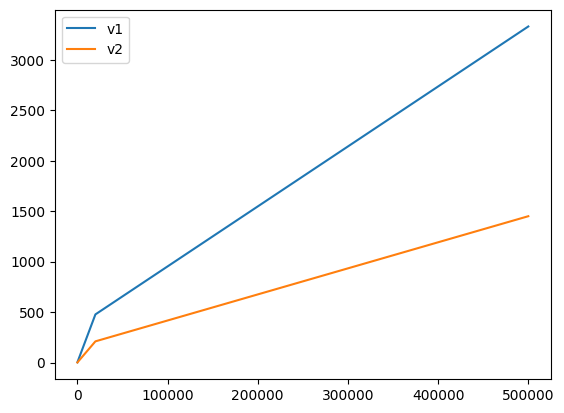

In [2]:
import matplotlib.pyplot as plt

df = pd.DataFrame(
    {
        'v1':[2.29, 477, 3330],
        'v2':[0.683, 210, 1450]
    },
    index=[20, 20000, 500000]
)

df.plot.line()